In [1]:
import pandas as pd
import numpy as np
import csv
import seaborn as sns

In [2]:
data = []
labels = []
with open("training_set.tsv") as tsvfile:
    tsvreader = csv.reader(tsvfile, delimiter="\t")
    for i, line in enumerate(tsvreader):
        if i %2 == 0:
            data.extend(line)
        else : 
            labels.extend(line)
print(len(data), len(labels))


5778 5778


In [3]:
df = pd.DataFrame(zip(data,labels),columns = ['sentence','sentiment'])
removed_word = ''' ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+,-'''
removed_word += '?~!@#$%^&*()_+'
removed_word += '1234567890' +'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'
removed_word += 'ａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ'
print(removed_word)
df['sentence'] = df['sentence'].apply(lambda sen : ''.join([word for word in sen if word not in removed_word]))

 ！？｡*。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘'‛“”„‟…‧﹏.+,-?~!@#$%^&*()_+1234567890abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZａｂｃｄｅｆｇｈｉｊｋｌｍｎｏｐｑｒｓｔｕｖｗｘｙｚＡＢＣＤＥＦＧＨＩＪＫＬＭＮＯＰＱＲＳＴＵＶＷＸＹＺ


In [4]:
def remove(sen):
    brands = ['佳能','尼康','富士','索尼','莱卡','徕卡','卡西欧','无敌兔','适马']
    for i in brands :
        if i in sen:
            sen = sen.replace(i,'')
    return sen
df['sentence']=df['sentence'].apply(lambda x : remove(x))


In [5]:
mask = np.random.rand(len(df)) <0.9
train = df[mask]
test = df[~mask]
test.to_csv('test.tsv',sep='\t',index=False)

In [6]:
from random import shuffle
neg = train[train['sentiment']=='negative']['sentence'].values
pos = train[train['sentiment']=='positive']['sentence'].values
def append_data(train,sen_l,sentiment):
    shuffle(sen_l)
    dict_list = []
    for a,b in zip(sen_l[0::2],sen_l[1::2]):
        dict_list.append({'sentence':a+b,'sentiment':sentiment})
    train = train.append(pd.DataFrame(dict_list))
    return train
for i in range(8):
    train = append_data(train,neg,'negative')
for i in range(6):
    train = append_data(train,neg,'positive')

In [7]:
train = train.sample(train.shape[0]).reset_index(drop=True)

In [8]:
train.to_csv('train.tsv',sep='\t',index=False)

(7985, 2)


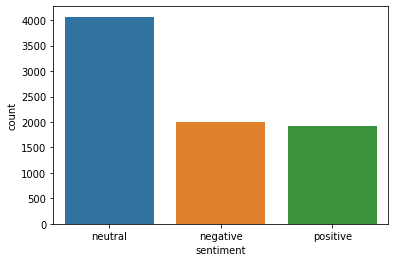

In [9]:
print(train.shape)
ax = sns.countplot(x='sentiment',  data=train)